In [1]:
from matplotlib import pyplot as plt
import numpy as np
import affine_invariant as af
from time import time

In [2]:
# plt.style.available

In [2]:
plt.style.use('ggplot') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [5]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [5.]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
sigmaw = [5.]
a = [8.]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0 + sigmaw + log_nu0]).flatten()

z_start = 0
z_end = 200
dz = 1
z, phi, Kz = af.solve_potential_dm(theta, z_start, z_end, dz)

theta.shape

solve_potential 0
solve_potential 1
solve_potential 2
solve_potential 3
solve_potential 4
solve_potential 5


(31,)

In [6]:
u = np.array([phi, Kz])
dphi, dKz = af.f(z, u, theta)

# single component

In [6]:
# rhob = [
#     0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
#     0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
# ]
# sigmaz = [
#     3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
#     18.0, 18.5, 18.5, 20.0, 20.0]
rhob = [0.011]
sigmaz = [3.7]
rhoDM = [0.016]
sigmaDD = [7]
hDD = [65]
R = [3.4E-3]
zsun = [30]

nb = len(rhob)

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + R + zsun]).flatten()

z_start = 0
z_end = 200
dz = 1
z, phi, Kz = af.solve_potential(theta, z_start, z_end, dz, nb)

theta.shape

(7,)

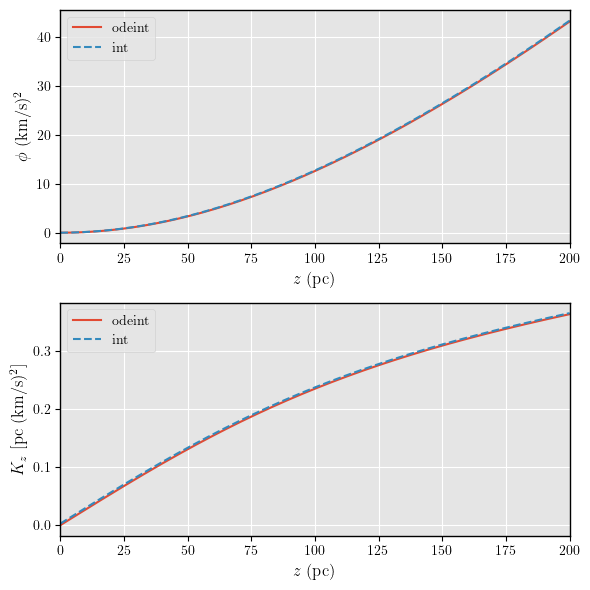

In [7]:
u = np.array([phi, Kz])
dphi, dKz = af.f(z, u, theta, 1)
phi_int = np.cumsum(dphi)*dz
Kz_int = np.cumsum(dKz)*dz
# subplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(z, phi, label=r"odeint")
ax[0].plot(z, phi_int, label=r"int", ls="--")
ax[0].set_xlabel(r"$z$ (pc)")
ax[0].set_ylabel(r"$\phi$ (km/s)$^2$")
ax[0].set_xlim(0, z[-1])
ax[0].set_ylim(0, phi[-1]*1.2)
ax[0].legend()
ax[1].plot(z, Kz, label=r"odeint")
ax[1].plot(z, Kz_int, label=r"int", ls="--")
ax[1].set_xlabel(r"$z$ (pc)")
ax[1].set_ylabel(r"$K_z$ [pc (km/s)$^2$]")
ax[1].set_xlim(0, z[-1])
ax[1].set_ylim(0, Kz[-1]*1.2)
ax[1].legend()
plt.tight_layout()
plt.show()

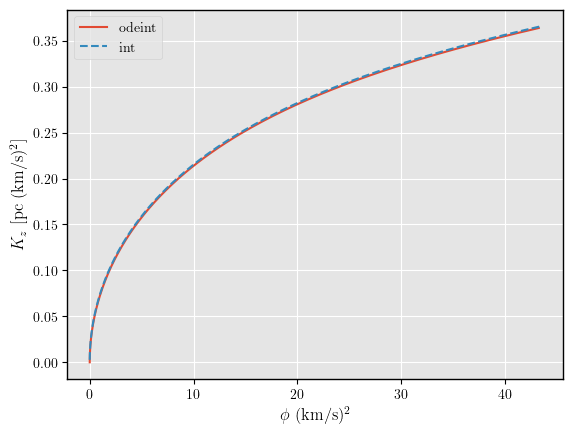

In [8]:
plt.plot(u[0], u[1], label=r"odeint")
plt.plot(phi_int, Kz_int, label=r"int", ls="--")
plt.xlabel(r"$\phi$ (km/s)$^2$")
plt.ylabel(r"$K_z$ [pc (km/s)$^2$]")
plt.legend()
plt.show()

# Multicomponent

In [9]:
rhob = [0.0104, 0.0277, 0.0073]
sigmaz = [3.7, 7.1, 22.1]

# rhob = [0.0104, 0.0277]
# sigmaz = [3.7, 7.1]

# rhob = [0.0104]
# sigmaz = [3.7]
rhoDM = [0.016]
sigmaDD = [7]
hDD = [65]
R = [3.4E-3]
zsun = [30]

nb = len(rhob)

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + R + zsun]).flatten()

z_start = 0
z_end = 200
dz = 1
z, phi, Kz = af.solve_potential(theta, z_start, z_end, dz, nb)

theta.shape

(11,)

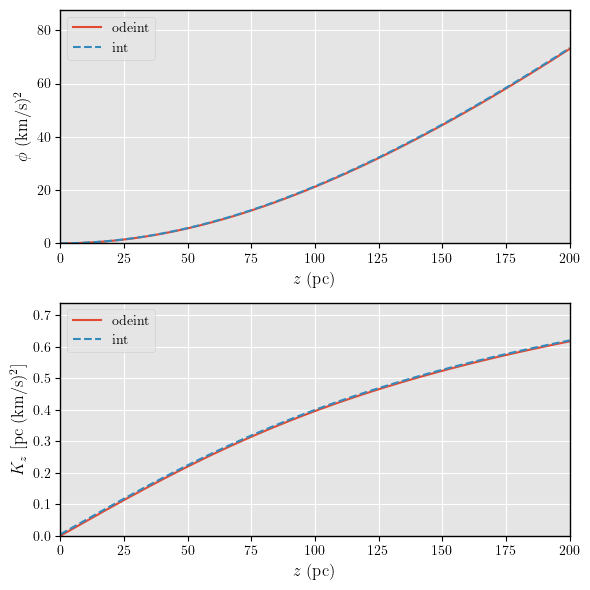

In [10]:
u = np.array([phi, Kz])
dphi, dKz = af.f(z, u, theta, nb)

phi_int = np.cumsum(dphi)*dz
Kz_int = np.cumsum(dKz)*dz
# subplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(z, phi, label=r"odeint")
ax[0].plot(z, phi_int, label=r"int", ls="--")
ax[0].set_xlabel(r"$z$ (pc)")
ax[0].set_ylabel(r"$\phi$ (km/s)$^2$")
ax[0].set_xlim(0, z[-1])
ax[0].set_ylim(0, phi[-1]*1.2)
ax[0].legend()
ax[1].plot(z, Kz, label=r"odeint")
ax[1].plot(z, Kz_int, label=r"int", ls="--")
ax[1].set_xlabel(r"$z$ (pc)")
ax[1].set_ylabel(r"$K_z$ [pc (km/s)$^2$]")
ax[1].set_xlim(0, z[-1])
ax[1].set_ylim(0, Kz[-1]*1.2)
ax[1].legend()
plt.tight_layout()
plt.show()

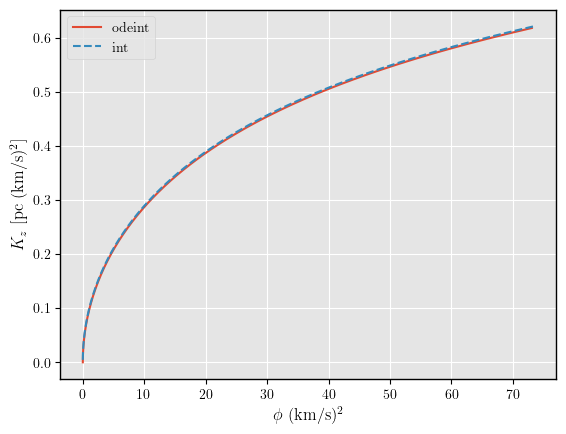

In [11]:
plt.plot(u[0], u[1], label=r"odeint")
plt.plot(phi_int, Kz_int, label=r"int", ls="--")
plt.xlabel(r"$\phi$ (km/s)$^2$")
plt.ylabel(r"$K_z$ [pc (km/s)$^2$]")
plt.legend()
plt.show()

# All out

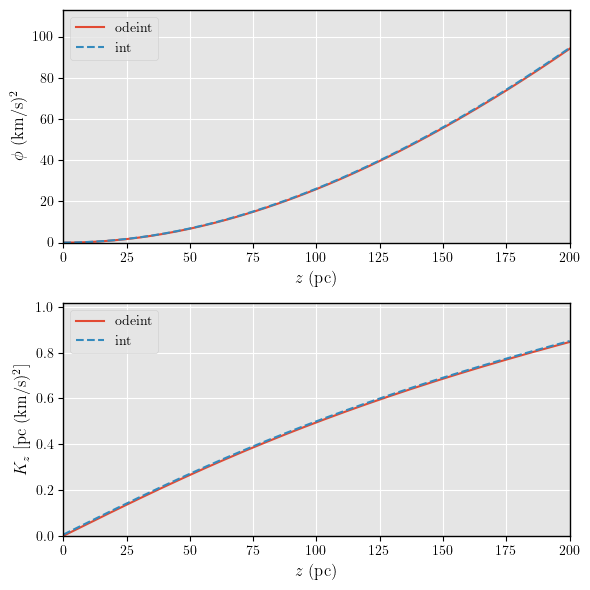

In [7]:
u = np.array([phi, Kz])
dphi, dKz = af.f(z, u, theta)
phi_int = np.cumsum(dphi)*dz
Kz_int = np.cumsum(dKz)*dz
# subplot
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(z, phi, label=r"odeint")
ax[0].plot(z, phi_int, label=r"int", ls="--")
ax[0].set_xlabel(r"$z$ (pc)")
ax[0].set_ylabel(r"$\phi$ (km/s)$^2$")
ax[0].set_xlim(0, z[-1])
ax[0].set_ylim(0, phi[-1]*1.2)
ax[0].legend()
ax[1].plot(z, Kz, label=r"odeint")
ax[1].plot(z, Kz_int, label=r"int", ls="--")
ax[1].set_xlabel(r"$z$ (pc)")
ax[1].set_ylabel(r"$K_z$ [pc (km/s)$^2$]")
ax[1].set_xlim(0, z[-1])
ax[1].set_ylim(0, Kz[-1]*1.2)
ax[1].legend()
plt.tight_layout()
plt.show()

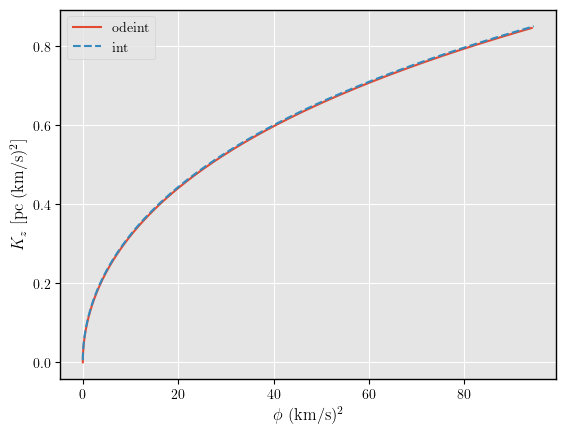

In [8]:
plt.plot(u[0], u[1], label=r"odeint")
plt.plot(phi_int, Kz_int, label=r"int", ls="--")
plt.xlabel(r"$\phi$ (km/s)$^2$")
plt.ylabel(r"$K_z$ [pc (km/s)$^2$]")
plt.legend()
plt.show()